#Тема: Исследование надёжности заёмщика


**Цель:**

Определить, как различные характеристики клиента влияют на факт погашения им кредита в срок.

**Вопросы на которые необходимо ответить:**


*   Есть ли зависимость между количеством детей и возвратом кредита в срок?
*   Есть ли зависимость между семейным положением и возвратом кредита в срок?

*   Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*   Как разные цели кредита влияют на его возврат в срок?





**Ход работы:**



1.   Знакомство с данными и изучение общей информации.
2.   Предобработка данных
3.   Визуализация и описание ответов на поставленные вопросы
4.   Общий вывод











**Описание данных:**

*   children — количество детей в семье;
*   days_employed — общий трудовой стаж в днях;
*   dob_years — возраст клиента в годах;
*   education — уровень образования клиента;
*   education_id — идентификатор уровня образования;
*   family_status — семейное положение;
*   family_status_id — идентификатор семейного положения;
*   gender — пол клиента;
*   income_type — тип занятости;
*   income_type — тип занятости;
*   debt — имел ли задолженность по возврату кредитов;
*   total_income — ежемесячный доход;
*   purpose — цель получения кредита.









# Шаг 1. Знакомство с данными и изучение общей информации

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem

In [2]:
data = pd.read_csv('/content/drive/My Drive/Python/data.csv') # чтение файла с данными и сохранение его в data

In [3]:
data.head(10) # получение первых десяти строк таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info() # получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Таблица имеет 12 столбцов.
Типы данных в таблице - `object, int64, float64`.

Сразу можно заметить, что в столбцах `'days_employed'` и `'total_income'` есть пропуски.

In [5]:
data.describe() # описание всех числовых столбцов

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Предварительно можно сказать, что в столбцах `'children'`, `'days_employed'`существуют аномальные значения.

Так же в этих столбцах присутствуют отрицательные значения.

# Шаг 2. Предобработка данных

**Удаление дубликатов**

In [6]:
data.duplicated().sum() # количество явных дубликатов

54

In [7]:
data = data.drop_duplicates() # удаление явных дубликатов

In [8]:
data = data.reset_index(drop = True) # обновление индексов

In [9]:
data.duplicated().sum() # проверка, что все дубликаты были удалены

0

In [10]:
data.education.value_counts() # просмотр уникальных значения в столбце

education
среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: count, dtype: int64

Можно заметить, что в столбце присутсвуют одинаковые данные, но записанные в разном регистре.

In [11]:
data.education = data.education.str.lower() # приводим значения к нижнему регистру

In [12]:
data.education.value_counts() # проерка

education
среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: count, dtype: int64

In [13]:
data.family_status.value_counts() # просмотр уникальных значения в столбце

family_status
женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: count, dtype: int64

Одно из значений начинается с заглавной буквы, надо всё привести к нижнему регистру.

In [14]:
data.family_status = data.family_status.str.lower() # приводим значения к нижнему регистру

In [15]:
data.family_status.value_counts() # проерка

family_status
женат / замужем          12344
гражданский брак          4163
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: count, dtype: int64

In [16]:
data.gender.value_counts() # просмотр уникальных значения в столбце

gender
F      14189
M       7281
XNA        1
Name: count, dtype: int64

Один человек не определился со своим полом, удалим эту строку.

In [17]:
data = data[data['gender'] != 'XNA'] # удаляем строку

In [18]:
data.gender.value_counts() # проверка

gender
F    14189
M     7281
Name: count, dtype: int64

In [19]:
data.income_type.value_counts() # просмотр уникальных значения в столбце

income_type
сотрудник          11091
компаньон           5079
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: count, dtype: int64

In [20]:
data.purpose.value_counts() # просмотр уникальных значения в столбце

purpose
свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образовани

Пока можно сказать, что все значения указаны в одном регистре, а уже категоризацией этих значений займёмся дальше.

**Исправление данных и аномалий**

In [21]:
data.describe() # описание всех числовых столбцов

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21470.000000,19350.000000,21470.000000,21470.000000,21470.000000,21470.000000,1.935000e+04
mean,0.539590,63049.877770,43.279972,0.817140,0.973684,0.081090,1.674204e+05
std,1.383006,140830.166081,12.573896,0.548462,1.421115,0.272979,1.029739e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.486276,33.000000,1.000000,0.000000,0.000000,1.030407e+05
50%,0.000000,-1203.307346,42.000000,1.000000,0.000000,0.000000,1.450117e+05
75%,1.000000,-291.077541,53.000000,1.000000,1.000000,0.000000,2.034244e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [22]:
data.children.value_counts() # просмотр уникальных значения в столбце

children
 0     14106
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

У некоторых из заёмщиков указано, что у них `20` детей, скорее всего такого быть не может, возможно они ошиблись, когда заполняли этот пункт. Так же присутствует значение равное `-1`. Рассчитаем для каждого из значений долю от общего количества.

In [23]:
data[data['children'] == 20]['children'].count() / data['children'].count() # рассчитываем долю строк со значением 20

0.0035398230088495575

Так как их доля мала, то удалим эти строки.

In [24]:
data = data[data['children'] != 20] # удаляем

In [25]:
data[data['children'] == -1]['children'].count() / data['children'].count() # рассчитываем долю строк со значением -1

0.0021968776292418434

Так как их доля мала, то удалим эти строки.

In [26]:
data = data[data['children'] != -1] # удаляем

In [27]:
data.children.value_counts() # проверка

children
0    14106
1     4809
2     2052
3      330
4       41
5        9
Name: count, dtype: int64

In [28]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


В столбце `days_employed` присутвуют отрицательные значения, надо это исправить.

In [29]:
data['days_employed'] = data['days_employed'].abs() # делаем значения неотрицательными

In [30]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21347.000000,19239.000000,21347.000000,21347.000000,21347.000000,21347.000000,1.923900e+04
mean,0.473697,67031.052813,43.286738,0.817023,0.974282,0.081136,1.674469e+05
std,0.752210,139133.681187,12.578381,0.549068,1.421332,0.273050,1.031075e+05
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,927.974414,33.000000,1.000000,0.000000,0.000000,1.030000e+05
50%,0.000000,2194.814342,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,5557.111735,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


D столбце `days_employed` есть аномальные значения в виде 400 тысяч дней - это больше 1100 лет, чего просто не может быть. Скорее всего эти данные выгружали из другой таблицы, где опыт был
указан в часах. Будем считать, что человек может иметь опыт работы равный 25 тысячам дней(примерно 70 лет),  посчитаем долю заёмщиков у которых это значение больше.

In [31]:
data[data['days_employed'] > 25000]['days_employed'].count() / data['days_employed'].count() # рассчитываем долю

0.1783356723322418

Доля этих строк большая, поэтому заменим их на медианное значение стажа среди остальных заёмщиков.

In [32]:
data.loc[data['days_employed'] > 25000,'days_employed'] = data[data['days_employed'] <= 25000]['days_employed'].median() # заменяем значения

In [33]:
data.describe() # проверяем, что теперь аномальных значений нет

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21347.000000,19239.000000,21347.000000,21347.000000,21347.000000,21347.000000,1.923900e+04
mean,0.473697,2224.670773,43.286738,0.817023,0.974282,0.081136,1.674469e+05
std,0.752210,2107.305897,12.578381,0.549068,1.421332,0.273050,1.031075e+05
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,927.974414,33.000000,1.000000,0.000000,0.000000,1.030000e+05
50%,0.000000,1630.394535,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,2747.256509,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Заметим, что в столбце `dob_years` минимальное значение равно 0. Посчитаем количество заёмщиков возраст которых меньше 18 лет.

In [34]:
data[data.dob_years < 18]['dob_years'].count() # считаем их количество

100

Так как количество таких строк мало, то просто удалим их.

In [35]:
data = data[data['dob_years'] >= 18] # удаляем эти строки

In [36]:
data[data.dob_years < 18]['dob_years'].count() # проверка

0

**Заполнение пропущенных значений**

In [37]:
data.isna().sum() # считаем пропущенные значения по столбцам

children               0
days_employed       2098
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2098
purpose                0
dtype: int64

В столбцах `days_employed` и `total_income` присутствуют пропущенные значения, их слишком много, чтобы просто удалить. Рассчитаем медиану по столбцам и заполним ими пропущенные места.

In [38]:
days_employed_median = data['days_employed'].median() #рассчитываем медиану по столбцу

In [76]:
data['days_employed'] = data['days_employed'].fillna(days_employed_median) # заменяем пропуски на медиану

In [40]:
total_income_median = data['total_income'].median() # рассчитываем медиану по столбцу

In [41]:
data['total_income'] = data['total_income'].fillna(total_income_median) # заменяем пропуски в столбце на медиану

In [42]:
data.isna().sum() # проверяем, что теперь пропущенных значений нет

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Изменение типа данных**

In [43]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,1630.394535,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Заменим вещественный тип данных в столбцах `days_employed` и `total_income` на целочисленный.

In [44]:
data['days_employed'] = data['days_employed'].astype('int') # изменяем тип данных на целочисленный

In [45]:
data['total_income'] = data['total_income'].astype('int') # изменяем тип данных на целочисленный

In [46]:
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
Index: 21247 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21247 non-null  int64 
 1   days_employed     21247 non-null  int64 
 2   dob_years         21247 non-null  int64 
 3   education         21247 non-null  object
 4   education_id      21247 non-null  int64 
 5   family_status     21247 non-null  object
 6   family_status_id  21247 non-null  int64 
 7   gender            21247 non-null  object
 8   income_type       21247 non-null  object
 9   debt              21247 non-null  int64 
 10  total_income      21247 non-null  int64 
 11  purpose           21247 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


**Лемматизация**

In [47]:
m = Mystem() # Mystem запищем в переменную m

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Нам необходимо лемматизировать столбец `purpose`, чтобы потом можно было разбить эти значения на категории. Для этого мы будем использовать метод `lemmatize` из библиотеки `pymystem3`. После лемматизации из полученного списка сделаем строку и запишем в новый столбец `lemmas_purpose`.

In [48]:
for i in data.index:
  data.loc[i,'lemmas_purpose'] = ' '.join(m.lemmatize(data.loc[i,'purpose'])) # лемматизируем

In [49]:
data.head() # проверяем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n


**Категоризация**

Теперь мы можем категоризировать цели заёмщиков, но для начала посмотрим какие данные у нас получились после лемматизации.

In [50]:
data.lemmas_purpose.value_counts()

lemmas_purpose
автомобиль \n                                    961
свадьба \n                                       787
на   проведение   свадьба \n                     764
сыграть   свадьба \n                             759
операция   с   недвижимость \n                   669
покупка   коммерческий   недвижимость \n         656
покупка   жилье   для   сдача \n                 648
операция   с   коммерческий   недвижимость \n    643
операция   с   жилье \n                          641
покупка   жилье   для   семья \n                 636
жилье \n                                         635
покупка   жилье \n                               634
недвижимость \n                                  627
строительство   собственный   недвижимость \n    626
операция   со   свой   недвижимость \n           623
строительство   недвижимость \n                  619
покупка   свой   жилье \n                        618
строительство   жилой   недвижимость \n          618
покупка   недвижимость \n      

Создадим словарь с целями кридита и напишем функцию, которая будет категоризировать данные.

In [51]:
dict_purpose = {
    'автомобиль':'автомобиль',
    'свадьба':'свадьба',
    'недвижимость':'недвижимость',
    'жилье':'недвижимость',
    'образование':'образование'
}

def make_category(row):
  original_lemms = m.lemmatize(row)
  for lemm in original_lemms:
    if lemm in dict_purpose.keys():
      return dict_purpose[lemm]

In [52]:
 # применим написанную выше функцию к столбцу 'lemmas_purpose' и полученный результат запишем в 'purpose_category'

data['purpose_category'] = data['lemmas_purpose'].apply(make_category)

In [53]:
data.head() # проверяем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба


Теперь категоризируем столбец с зарплатой заёмщиков, для этого напишем функцию.

Всего будет 5 категорий дохода:

`сверхмалый` - ниже 30000;

`малый` - от 30000 до 80000;

`средний` - от 80000 до 150000;

`большой` - от 150000 до 250000;

`сверхбольшой` - от 250000 и выше.

In [54]:
def make_total_income_category(row):
  if row < 30000:
    return 'сверхмалый'
  if row >= 30000 and row < 80000:
    return 'малый'
  if row >= 80000 and row < 150000:
    return 'средний'
  if row >= 150000 and row < 250000:
    return 'большой'
  if row >= 250000:
    return 'сверхбольшой'

In [55]:
# применим написанную выше функцию к столбцу 'total_income' и полученный результат запишем в 'total_income_category'

data['total_income_category'] = data['total_income'].apply(make_total_income_category)

In [56]:
data.head() # проверяем


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,purpose_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,недвижимость,сверхбольшой
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль,средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,недвижимость,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование,сверхбольшой
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба,большой


# Шаг 3. Визуализация и описание ответов на поставленные вопросы

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Для этого создадим сводную таблицу из трёх столбцов с количеством людей у которых не было задолжностей по кредитам,у которых были задолжности и процент людей с задолжностями по кредитам от общего количества, а индексами будут значения из столбца `children`.

In [57]:
# создаём сводную таблицу

children_pivot_table = pd.pivot_table(data,index = 'children',columns = 'debt',values = 'days_employed',aggfunc = 'count').reset_index()

In [58]:
children_pivot_table

debt,children,0,1
0,0,12979.0,1058.0
1,1,4352.0,441.0
2,2,1845.0,194.0
3,3,301.0,27.0
4,4,37.0,4.0
5,5,9.0,NaN


In [59]:
children_pivot_table = children_pivot_table.fillna(0) # заполняем пустое значение

In [60]:
# создаём столбец с процентами

children_pivot_table['percent'] = children_pivot_table[1]/ (children_pivot_table[1] + children_pivot_table[0]) * 100

In [61]:
# сортируем таблицу по убыванию по столбцу с процентами

children_pivot_table.sort_values(by = 'percent',ascending=False)

debt,children,0,1,percent
4,4,37.0,4.0,9.756098
2,2,1845.0,194.0,9.514468
1,1,4352.0,441.0,9.200918
3,3,301.0,27.0,8.231707
0,0,12979.0,1058.0,7.537223
5,5,9.0,0.0,0.000000


In [62]:
children_pivot_table

debt,children,0,1,percent
0,0,12979.0,1058.0,7.537223
1,1,4352.0,441.0,9.200918
2,2,1845.0,194.0,9.514468
3,3,301.0,27.0,8.231707
4,4,37.0,4.0,9.756098
5,5,9.0,0.0,0.000000


Для большей наглядности создадим столбчатую диаграмму, где по оси x будут значения из столбца `children`, а по оси y из столбца `percent`.

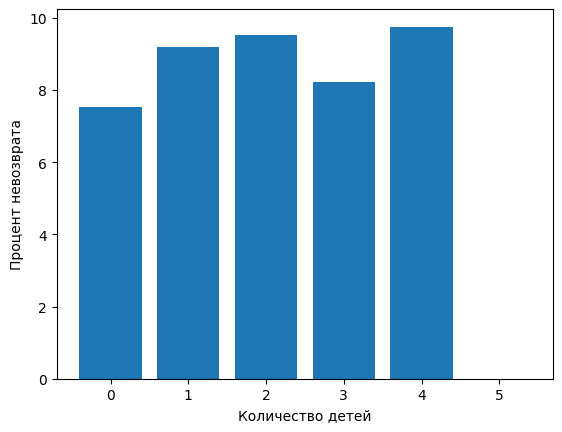

In [63]:
index = children_pivot_table['children']
values = children_pivot_table['percent']
plt.bar(index,values)
plt.xlabel('Количество детей')
plt.ylabel('Процент невозврата')
plt.show()

**Вывод:**

Самыми нажёжными плательщиками являются люди имеющие 5 детей, но это всё-таки частный случай,ведь таких людей мало.

Наименьший процент просрочки имеют люди у которых нет детей(7.53%), остальные группы имеют на 1-2% больше.



**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Для этого создадим сводную таблицу из трёх столбцов с количеством людей у которых не было задолжностей по кредитам,у которых были задолжности и процент людей с задолжностями по кредитам от общего количества, а индексами будут значения из столбца `family_status`.

In [64]:
# создаём сводную таблицу

family_pivot_table = pd.pivot_table(data,index = 'family_status',columns = 'debt',aggfunc = 'count',values = 'days_employed').reset_index()

In [65]:
# создаём столбец с процентами

family_pivot_table['percent'] = family_pivot_table[1] / (family_pivot_table[1] + family_pivot_table[0]) * 100

In [66]:
# сортируем таблицу по убыванию по столбцу с процентами

family_pivot_table.sort_values(by = 'percent',ascending=False)

debt,family_status,0,1,percent
4,не женат / не замужем,2508,272,9.784173
2,гражданский брак,3741,383,9.287100
3,женат / замужем,11295,923,7.554428
0,в разводе,1095,84,7.124682
1,вдовец / вдова,884,62,6.553911


Для большей наглядности создадим горизонтальную столбчатую диаграмму, где по оси x будут значения из столбца `percent`, а по оси y из столбца `family_status`.

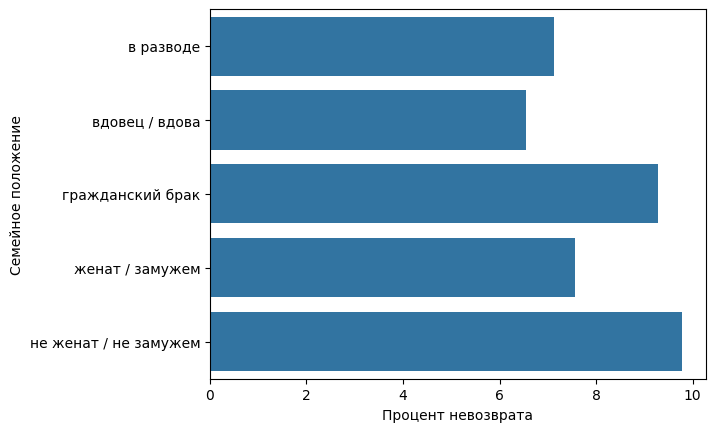

In [67]:
index = family_pivot_table['family_status']
values = family_pivot_table['percent']
sns.barplot(y = index,x = values)
plt.xlabel('Процент невозврата')
plt.ylabel('Семейное положение')
plt.show()



**Вывод:**

Самыми нажёжными плательщиками являются люди, которые оформляли свои отношения официально. Даже если после этого они развелись или остались вдовами/вдовцами.

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Для этого создадим сводную таблицу из трёх столбцов с количеством людей у которых не было задолжностей по кредитам,у которых были задолжности и процент людей с задолжностями по кредитам от общего количества, а индексами будут значения из столбца `total_income_category`.

In [68]:
# создаём сводную таблицу

income_pivot_table = pd.pivot_table(data,index = 'total_income_category', columns = 'debt',values = 'days_employed',aggfunc= 'count').reset_index()

In [69]:
# создаём столбец с процентами

income_pivot_table['percent'] = income_pivot_table[1] / (income_pivot_table[0] + income_pivot_table[1]) * 100

In [70]:
# сортируем таблицу по убыванию по столбцу с процентами

income_pivot_table.sort_values(by = 'percent',ascending= False)

debt,total_income_category,0,1,percent
3,сверхмалый,20,2,9.090909
4,средний,9073,832,8.399798
0,большой,5781,525,8.325404
1,малый,2059,172,7.709547
2,сверхбольшой,2590,193,6.934962


Для большей наглядности создадим горизонтальную столбчатую диаграмму, где по оси x будут значения из столбца `percent`, а по оси y из столбца `total_income_category`.

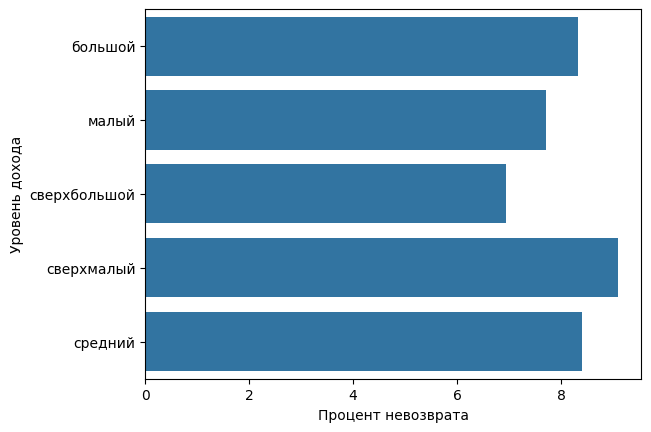

In [71]:
sns.barplot(y = income_pivot_table['total_income_category'],x = income_pivot_table['percent'])
plt.xlabel('Процент невозврата')
plt.ylabel('Уровень дохода')
plt.show()



**Вывод:**

Самыми нажёжными плательщиками являются люди имеющие доход больше 250 тысяч(6.93%), самыми неисполнительными плательщиками являются люди, которые зарабатывают меньше 30 тысяч(9.09%).


**Как разные цели кредита влияют на его возврат в срок?**

Для этого создадим сводную таблицу из трёх столбцов с количеством людей у которых не было задолжностей по кредитам,у которых были задолжности и процент людей с задолжностями по кредитам от общего количества, а индексами будут значения из столбца `purpose_category`.

In [72]:
# создаём сводную таблицу

purpose_pivot_table = pd.pivot_table(data,index = 'purpose_category',columns = 'debt',values = 'days_employed',aggfunc = 'count').reset_index()

In [73]:
# создаём столбец с процентами

purpose_pivot_table['percent'] = purpose_pivot_table[1] / (purpose_pivot_table[1] + purpose_pivot_table[0]) * 100

In [74]:
# сортируем таблицу по убыванию по столбцу с процентами

purpose_pivot_table.sort_values(by = 'percent',ascending= False)

debt,purpose_category,0,1,percent
0,автомобиль,3863,397,9.319249
2,образование,3602,369,9.292370
3,свадьба,2129,181,7.835498
1,недвижимость,9929,777,7.257613


Для большей наглядности создадим горизонтальную столбчатую диаграмму, где по оси x будут значения из столбца percent, а по оси y из столбца `purpose_category`.

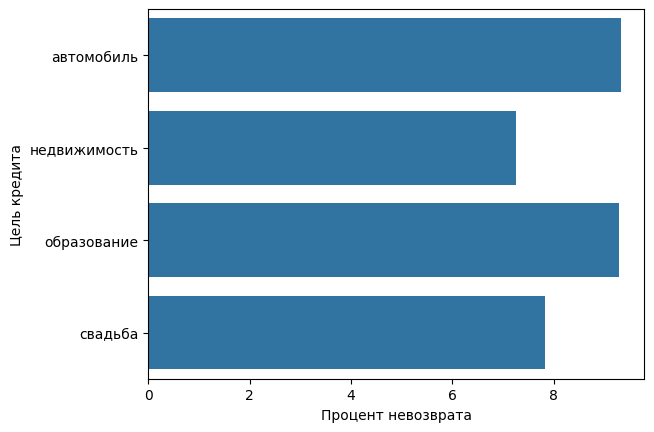

In [75]:
sns.barplot(y = purpose_pivot_table['purpose_category'],x = purpose_pivot_table['percent'])
plt.xlabel('Процент невозврата')
plt.ylabel('Цель кредита')
plt.show()



**Вывод:**

Самыми нажёжными плательщиками являются люди ,берущие кредит на недвижимость(7.25%), а хуже всего возвращают кредиты люди взявшие деньги на автомобиль(9.31%) и образование(9.29%)


# Шаг 4. Общий вывод

*   Самыми надёжными плательщиками являются люди состоявшие в официальных отношениях, не имеющие детей, с доходом выше среднего и берущие кредит с целью каких-либо операций с недвижимостью.


*   Самыми неисполнительными плательщиками являются люди не состоявшие в официальных отношениях, но имеющие детей, с низким доходом,желающие потратить кредит на автомобиль или образование.

